# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Nestor Canales / Adriana Torres ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [1]:
#Solution
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Solution
import requests
response1 = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD39552DA/json/1922/2021")
status_code1 = response1.status_code
status_code1 # Si tiene un valor de 200 significa que no hay problemas en conectar con el server.

200

In [3]:
response1.json()

{'config': {'title': 'PBI Sectorial',
  'series': [{'name': 'PBI Sectorial - PBI (Var.%)', 'dec': '2'}]},
 'periods': [{'name': '1922', 'values': ['5.0729656158704']},
  {'name': '1923', 'values': ['4.49074992490569']},
  {'name': '1924', 'values': ['8.90188453818352']},
  {'name': '1925', 'values': ['3.14503419077236']},
  {'name': '1926', 'values': ['9.38144740696487']},
  {'name': '1927', 'values': ['3.06884366977354']},
  {'name': '1928', 'values': ['5.37128980577405']},
  {'name': '1929', 'values': ['12.5901916131793']},
  {'name': '1930', 'values': ['-9.49378571993242']},
  {'name': '1931', 'values': ['-6.60573484082909']},
  {'name': '1932', 'values': ['-3.25061969031152']},
  {'name': '1933', 'values': ['10.7601785436389']},
  {'name': '1934', 'values': ['12.7040813671012']},
  {'name': '1935', 'values': ['8.85232604830794']},
  {'name': '1936', 'values': ['4.81434996118963']},
  {'name': '1937', 'values': ['1.9379182894299']},
  {'name': '1938', 'values': ['2.00597873801003']}

In [4]:
response2 = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01728AM/json/2022/2024")
status_code2 = response2.status_code
status_code2

200

In [5]:
response2.json()

{'config': {'title': 'Producto bruto interno y demanda interna (variaciones porcentuales anualizadas)',
  'series': [{'name': 'Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - PBI',
    'dec': '1'}]},
 'periods': [{'name': 'Ene.2022', 'values': ['2.76349432316665']},
  {'name': 'Feb.2022', 'values': ['4.70291294109833']},
  {'name': 'Mar.2022', 'values': ['3.83830111073661']},
  {'name': 'Abr.2022', 'values': ['4.00212973664761']},
  {'name': 'May.2022', 'values': ['2.61019336189649']},
  {'name': 'Jun.2022', 'values': ['3.47478980814159']},
  {'name': 'Jul.2022', 'values': ['1.8025721283913']},
  {'name': 'Ago.2022', 'values': ['1.97427453328511']},
  {'name': 'Sep.2022', 'values': ['2.13997812996818']},
  {'name': 'Oct.2022', 'values': ['2.3335148356285']},
  {'name': 'Nov.2022', 'values': ['2.12160068474319']},
  {'name': 'Dic.2022', 'values': ['1.04248993191112']},
  {'name': 'Ene.2023', 'values': ['-0.868373324968725']},
  {'name': 'Feb.2023', 'val

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [6]:
# Solution
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Vemos la serie en general
import pandas as pd 
URL ='https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01770AM/html'
BCRP = pd.read_html(URL) 
serie_general=BCRP[1]
serie_general #lo visualizamos

,Fecha,Producto bruto interno y demanda interna (índice 2007=100) - PBI
0,Ene03,73.2
1,Feb03,71.1
2,Mar03,74.3
3,Abr03,80.7
4,May03,83.2
...,...,...
245,Jun23,177.3
246,Jul23,175.5
247,Ago23,178.1
248,Sep23,180.0


In [10]:
#Vemos la serie pre pandemia
#OJO: se va hasta la 207 para que tome en consideración la columna 206 (dic-2019)
serie_prepandemia = serie_general[145:207].copy()  
#se añade una columna "tiempo"
serie_prepandemia.loc[:, 'Tiempo'] = range(1, len(serie_prepandemia) + 1)
#Reiniciamos los índices del DataFrame:
serie_prepandemia = serie_prepandemia.reset_index(drop=True)

In [22]:
#serie contrafactual
serie_prepandemia_contrafactual=serie_general[145:251].copy()  
#se añade una columna "tiempo"
serie_prepandemia_contrafactual.loc[:, 'Tiempo'] = range(1, len(serie_prepandemia_contrafactual) + 1)
#Reiniciamos los índices del DataFrame:
serie_prepandemia_contrafactual = serie_prepandemia_contrafactual.reset_index(drop=True)

#hallamos el logaritmo para ajustar los datos por estacionalidad
# Calculamos el crecimiento mensual de la serie
serie_prepandemia_contrafactual['Log_PBI'] = np.log1p(serie_prepandemia_contrafactual['Producto bruto interno y demanda interna (índice 2007=100) - PBI'])
serie_prepandemia_contrafactual #lo visualizamos
# Implementamos una media móvil con ventana de 12 meses para suavizar las fluctuaciones
serie_prepandemia['Crecimiento mensual'] = serie_prepandemia['Producto bruto interno y demanda interna (índice 2007=100) - PBI'].pct_change() * 100
#Implementamos una media móvil con ventana de 12 meses para suavizar las fluctuaciones
serie_prepandemia['Media_movil'] = serie_prepandemia['Crecimiento mensual'].rolling(window=12).mean()
serie_prepandemia # Visualizamos el resultado en el DataFrame


,Fecha,Producto bruto interno y demanda interna (índice 2007=100) - PBI,Tiempo,Crecimiento mensual,Media_movil
0,Feb15,137.5,1,NaN,NaN
1,Mar15,148.3,2,7.854545,NaN
2,Abr15,152.0,3,2.494943,NaN
3,May15,150.2,4,-1.184211,NaN
4,Jun15,150.6,5,0.266312,NaN
...,...,...,...,...,...
57,Nov19,174.2,58,-1.191151,0.392502
58,Dic19,189.6,59,8.840413,0.296849
59,Ene20,162.4,60,-14.345992,0.436820
60,Feb20,161.8,61,-0.369458,0.543860


In [23]:
#Es ahí que iniciamos haciendo la regresion
regresion1 = sm.OLS(serie_prepandemia['Producto bruto interno y demanda interna (índice 2007=100) - PBI'], sm.add_constant(serie_prepandemia['Tiempo'])).fit()
serie_prepandemia['tendencia_anterior'] = regresion1.predict(sm.add_constant(serie_prepandemia['Tiempo'])) #Se calculan las predicciones de la tendencia anterior utilizando el modelo de regresión lineal y se almacenan en una nueva columna llamada 'tendencia_anterior'
regresion1.summary()

#Predicción de Futuros Índices de PBI (sin pandemia):
sin_pandemia = pd.DataFrame({'X': np.arange(1, 106)})
sin_pandemia['Y'] = regresion1.predict(sm.add_constant(sin_pandemia['X']))
#Se crea un nuevo DataFrame sin_pandemia que contiene una serie de valores para la variable independiente 'X' (posiblemente representando períodos futuros). 
#Luego, se calculan las predicciones correspondientes utilizando el modelo de regresión y se almacenan en la columna 'Y'.

#Finalmente calculamos el log para desestabilizar
sin_pandemia['Log_Y'] = np.log1p(sin_pandemia['Y'])
sin_pandemia

,X,Y,Log_Y
0,1,150.239478,5.018865
1,2,150.604973,5.021278
2,3,150.970469,5.023686
3,4,151.335965,5.026088
4,5,151.701461,5.028485
...,...,...,...
100,101,186.789048,5.235319
101,102,187.154544,5.237264
102,103,187.520040,5.239204
103,104,187.885535,5.241141


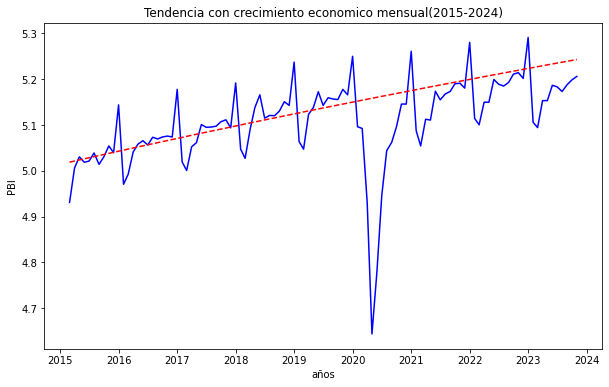

In [29]:
#Iniciamos a hacer el grafico
import matplotlib.dates as mdates
# Viendo la columna de "tiempo"
serie_prepandemia_contrafactual['Tiempo'] = pd.date_range(start='2015-02-01', periods=len(serie_prepandemia_contrafactual), freq='M')
sin_pandemia['X'] = pd.date_range(start='2015-02-01', periods=len(sin_pandemia), freq='M')
# Convertir 'Tiempo' y 'X' a objetos de fecha y hora
serie_prepandemia_contrafactual['Tiempo'] = pd.to_datetime(serie_prepandemia_contrafactual['Tiempo'])
sin_pandemia['X'] = pd.to_datetime(sin_pandemia['X'])

#Comparamos
plt.figure(figsize=(10, 6))
plt.plot(serie_prepandemia_contrafactual['Tiempo'], serie_prepandemia_contrafactual['Log_PBI'], label='PBI', color='blue')
plt.plot(sin_pandemia['X'], sin_pandemia['Log_Y'], label='Tendencia anerior a la etapa de pandemia(OLS)', linestyle='--', color='red')

# Formatea el eje x para mostrar las fechas
axes = plt.gca()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.set_title('Tendencia con crecimiento economico mensual(2015-2024)')

#Finalmente, tenemos el gráfico
plt.xlabel('años')
plt.ylabel('PBI')
plt.show()

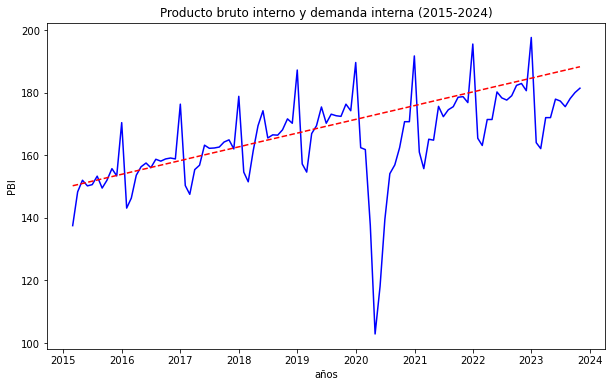

In [37]:
#Lo vemos por años:
import matplotlib.dates as mdates
serie_prepandemia_contrafactual['Tiempo'] = pd.date_range(start='2015-02-01', periods=len(serie_prepandemia_contrafactual), freq='M')
sin_pandemia['X'] = pd.date_range(start='2015-02-01', periods=len(sin_pandemia), freq='M')

#comparamos
plt.figure(figsize=(10, 6))
plt.plot(serie_prepandemia_contrafactual['Tiempo'], serie_prepandemia_contrafactual['Producto bruto interno y demanda interna (índice 2007=100) - PBI'], label='PBI', color='blue')
plt.plot(sin_pandemia['X'], sin_pandemia['Y'], label='Tendencia anterior a la etapa de pandemia(OLS)', linestyle='--', color='red')

#Usando axes como alternativa
axes = plt.gca()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.set_title('Producto bruto interno y demanda interna (2015-2024)')

plt.xlabel('años')
plt.ylabel('PBI')
plt.show()

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [ ]:
# Solution